
## 5 th analisis 
### PARA: 
  `AVG_BONDS Y N_BONDS Y AVG_BULK`
===================================================================

# ANALISIS DE DATOS DE NANOPARTICULAS DE ORO
### EDA
#### Autora: Josefina Cresta

### Importación de librerias

In [20]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
#plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Importación de base de datos

In [41]:
data = pd.read_csv("Au_nanoparticle_dataset.csv")

In [42]:
cols=['ID', 'T', 'tau', 'time', 'N_total', 'N_bulk', 'N_surface', 'Volume', 'R_avg','Avg_total', 'Avg_bulk', 'Avg_surf', 'N_bonds', 'Avg_bonds', 'Total_E', 'Formation_E']
data_7= data.loc[:,cols]
data_7
data_7.head(4)

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_avg,Avg_total,Avg_bulk,Avg_surf,N_bonds,Avg_bonds,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,17.3706,11.1770,12.5552,8.7880,8936,2.92220,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,17.6061,11.0719,12.4952,8.6513,9090,2.92505,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,25.3692,11.3862,12.3902,8.7303,26399,2.92120,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,29.7011,11.3198,12.3027,8.5778,40689,2.91181,-26937.2010,1171.7890


In [43]:
#Lista de variables locales
cols=['ID', 'T', 'tau', 'time', 'N_total', 'N_bulk', 'N_surface', 'Volume', 'R_avg','Avg_total', 'Avg_bulk', 'Avg_surf', 'N_bonds', 'Avg_bonds', 'Total_E', 'Formation_E']

#Diccionario de traduccioón
traduccion={"ID":           "ID",
            "T":            "Temp",
            "tau":          "Crecimiento", 
            "time":         "Tiempo", 
            "N_total":      "N_total",
            "N_bulk":       "N_bulk",
            "N_surface":    "N_super", 
            "Volume":       "Volumen",
            "R_avg":        "Radio",
            "Avg_total":    "Coord_all",
            "Avg_bulk":     "Coord_bulk",
            "Avg_surf":     "Coord_super",
            "N_bonds":      "N_enlaces",
            "Avg_bonds":    "Long_enlaces",
            "Total_E":      "Total_E",
            "Formation_E":  "Energia_Forma",
}

In [44]:
data_7 = data_7[cols].rename(columns=traduccion)

In [45]:
data_7.sample(6)

,ID,Temp,Crecimiento,Tiempo,N_total,N_bulk,N_super,Volumen,Radio,Coord_all,Coord_bulk,Coord_super,N_enlaces,Long_enlaces,Total_E,Energia_Forma
2424,2425,723,0.000000,10,1163,707,456,1.970000e-26,15.5807,10.7343,12.1881,8.4803,6242,2.91072,-4130.0017,417.3283
2611,2612,723,0.000000,10,2166,1444,722,3.670000e-26,19.4459,10.9686,12.1572,8.5914,11879,2.91644,-7767.8243,701.2357
2403,2404,723,0.000000,10,1103,672,431,1.870000e-26,15.3066,10.7126,12.1860,8.4153,5908,2.91278,-3909.5607,403.1693
2922,2923,773,0.000075,3,3233,2262,971,5.470000e-26,22.6104,10.9855,12.0676,8.4645,17758,2.94738,-11705.9970,935.0330
1084,1085,423,0.000225,5,1527,848,679,2.590000e-26,17.8540,10.4676,12.1285,8.3932,7992,2.88819,-5578.2061,392.3639
3470,3471,923,0.000000,10,1403,869,534,2.380000e-26,16.8181,10.5175,11.8849,8.2921,7378,2.94326,-4814.8985,670.8315


# Analisis de Normalidad 

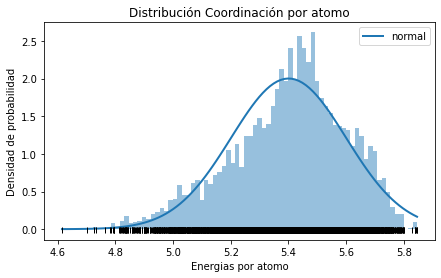

In [26]:
# Histograma + curva normal teórica
# ==============================================================================
data=data_7.N_enlaces/data_7.N_total

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(data), max(data), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data, density=True, bins=80, color="#3182bd", alpha=0.5)
ax.plot(data, np.full_like(data, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución Coordinación por atomo')
ax.set_xlabel('Energias por atomo')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [27]:
# Estadísticos de asimetría (Skewness) y curtosis
# ==============================================================================
print('Kursotis:', stats.kurtosis(data))
print('Skewness:', stats.skew(data))

Kursotis: 0.008078392967274084
Skewness: -0.5098558275753412


In [28]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(data)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 155.23105208400213, p-value = 1.9588687138533553e-34


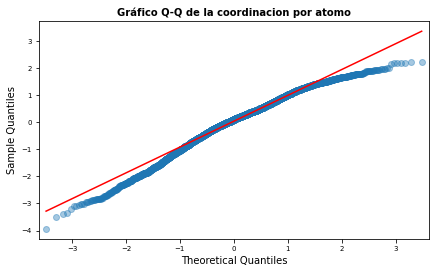

In [29]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    data,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de la coordinacion por atomo', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

In [47]:
data = pd.read_csv("Au_nanoparticle_dataset.csv")
cols=['N_total', 'N_bulk', 'Avg_total', 'Avg_bulk', 'Avg_surf', 'N_bonds', 'Avg_bonds','FCC','HCP', 'ICOS','DECA', 'Total_E']
data_7= data.loc[:,cols]

In [48]:
data_7

,N_total,N_bulk,Avg_total,Avg_bulk,Avg_surf,N_bonds,Avg_bonds,FCC,HCP,ICOS,DECA,Total_E
0,1599,1014,11.1770,12.5552,8.7880,8936,2.92220,24,23,2,8,-5908.6345
1,1642,1034,11.0719,12.4952,8.6513,9090,2.92505,30,35,1,7,-6035.4034
2,4637,3365,11.3862,12.3902,8.7303,26399,2.92120,700,376,0,17,-17330.1660
3,7189,5292,11.3198,12.3027,8.5778,40689,2.91181,1858,823,0,11,-26937.2010
4,11004,8508,11.3851,12.2159,8.5533,62641,2.91042,3575,1350,0,28,-41427.9010
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1509,950,10.5010,11.8126,8.2719,7923,2.94491,0,0,0,0,-5346.9589
3996,2315,1469,10.5114,11.7971,8.2790,12167,2.94709,0,0,0,0,-8218.1252
3997,2764,1905,10.7127,11.7948,8.3132,14805,2.95349,0,0,0,0,-9876.2899
3998,3148,2199,10.7497,11.8058,8.3024,16920,2.95409,1,1,0,1,-11261.0810


<AxesSubplot:>

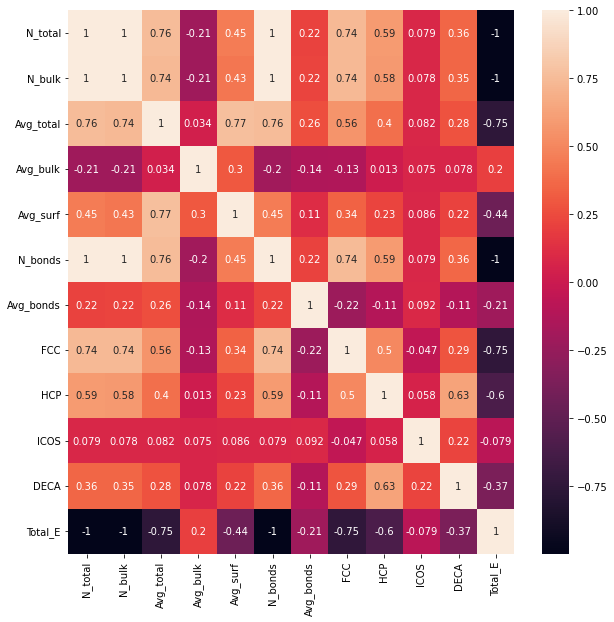

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(data_7.corr(), annot=True)

# Utilizaremos las siguientes hipótesis:
## H0 : ? = 0 (no existe relación)
## H1 : ? != 0 (sí existe relación)
Si utilizamos un nivel de confianza del 95% y obtenemos que p < .05, rechazamos la H0 y decimos que existe una correlación significativa (H1). En caso contrario, no podemos rechazar la hipótesis nula, y no podemos afirmar que la correlación difiera significativamente de 0.

# 2do Test de Hipotesis. Cantidad de atomos con arreglo en FCC (no tiene mucho sentido. obvio mas atomos mas arreglos)

Correlación Pearson: r=0.7409633588655291, p-value=0.0
Correlación Spearman: r=0.6135272739190392, p-value=0.0
Correlación Pearson: r=0.486394245185963, p-value=0.0


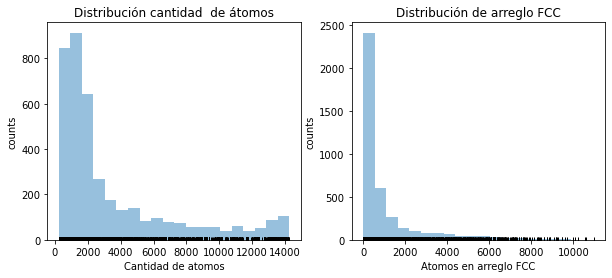

In [33]:
# Gráfico distribución variables
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(x=data.N_total, bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(data.N_total, np.full_like(data.N_total, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución cantidad  de átomos')
axs[0].set_xlabel('Cantidad de atomos')
axs[0].set_ylabel('counts')

axs[1].hist(x=data.FCC, bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(data.FCC, np.full_like(data.FCC, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución de arreglo FCC')
axs[1].set_xlabel('Atomos en arreglo FCC')
axs[1].set_ylabel('counts')

# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(data['N_total'], data['FCC'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(data['N_total'], data['FCC'])
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(data['N_total'], data['FCC'])
print(f"Correlación Pearson: r={r}, p-value={p}")

In [34]:
def testDeHipotesis(data, col1, col2):
    print("Hipótesis")
    print(f"\t Nula (H0): No exite relación entre {col1} y {col2}")
    print(f"\t Alternativa (HA): Sí exite relación entre {col1} y {col2}")
    print("_"*40)
    print("Nota: \n\tSe utiliza un nivel de confianza del 95%")
    print("\tEs decir que si se obtiene  p_valor < 0.05:")
    print("\tSe rechaza la H0 y existe una correlación significativa.")
    print("\tEn caso contrario no es posible afirmar que la correlación difiera significativamente de 0.")
    print("_"*40)

    # Cálculo de correlación y significancia con Scipy
    # ==============================================================================
    print("Coeficientes correlación y P_values según distintas implementaciones:")
    r, p = stats.pearsonr(data[col1], data[col2])
    print(f"\tCorrelación Pearson: r={r}, p-value={p}")

    r, p = stats.spearmanr(data[col1], data[col2])
    print(f"\tCorrelación Spearman: r={r}, p-value={p}")

    r, p = stats.kendalltau(data[col1], data[col2])
    print(f"\tCorrelación Pearson: r={r}, p-value={p}")

     # Gráfico distribución variables
    # ==============================================================================
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

    axs[0].hist(x=data[col1], bins=20, color="#3182bd", alpha=0.5)
    axs[0].set_title(f'Distribución de {col1}')
    axs[0].set_xlabel(col1)
    axs[0].set_ylabel('counts')

    axs[2].hist(x=data[col2], bins=20, color="#3182bd", alpha=0.5)
    axs[2].set_title(f'Distribución de {col2}')
    axs[2].set_xlabel(col2)
    axs[2].set_ylabel('counts')

    axs[1].scatter(x=data[col1], y=data[col2], alpha= 0.8)
    title=f'{col1} vs {col2}'
    axs[1].set_title(title)
    axs[1].set_xlabel(col1)
    axs[1].set_ylabel(col2)

    #Conclusión test de Hipotesis
    # ==============================================================================
    print("*"*80)
    alpha=0.05
    if p <= alpha:
        print(f"Se rechaza H0 \n\t Exite correlación significativa entre {col1} y {col2}")
    else:
        print(f"Se acepta H0 \n\t No es posible afirmar correlación significativa entre {col1} y {col2}")
    print("*"*80)   

Hipótesis
	 Nula (H0): No exite relación entre N_total y FCC
	 Alternativa (HA): Sí exite relación entre N_total y FCC
________________________________________
Nota: 
	Se utiliza un nivel de confianza del 95%
	Es decir que si se obtiene  p_valor < 0.05:
	Se rechaza la H0 y existe una correlación significativa.
	En caso contrario no es posible afirmar que la correlación difiera significativamente de 0.
________________________________________
Coeficientes correlación y P_values según distintas implementaciones:
	Correlación Pearson: r=0.7409633588655291, p-value=0.0
	Correlación Spearman: r=0.6135272739190392, p-value=0.0
	Correlación Pearson: r=0.486394245185963, p-value=0.0
********************************************************************************
Se rechaza H0 
	 Exite correlación significativa entre N_total y FCC
********************************************************************************


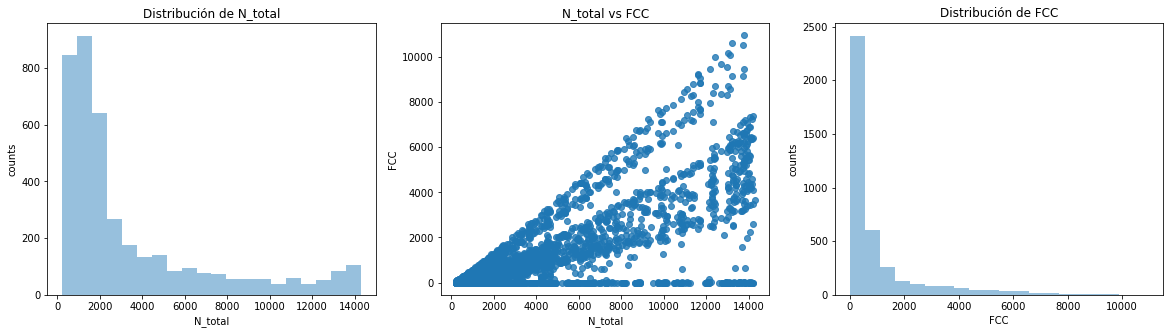

In [35]:
testDeHipotesis(data, "N_total", "FCC")

In [38]:
data_7

,N_total,N_bulk,Avg_total,Avg_bulk,Avg_surf,N_bonds,Avg_bonds,FCC,HCP,ICOS,DECA,Total_E
0,1599,1014,11.1770,12.5552,8.7880,8936,2.92220,24,23,2,8,-5908.6345
1,1642,1034,11.0719,12.4952,8.6513,9090,2.92505,30,35,1,7,-6035.4034
2,4637,3365,11.3862,12.3902,8.7303,26399,2.92120,700,376,0,17,-17330.1660
3,7189,5292,11.3198,12.3027,8.5778,40689,2.91181,1858,823,0,11,-26937.2010
4,11004,8508,11.3851,12.2159,8.5533,62641,2.91042,3575,1350,0,28,-41427.9010
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1509,950,10.5010,11.8126,8.2719,7923,2.94491,0,0,0,0,-5346.9589
3996,2315,1469,10.5114,11.7971,8.2790,12167,2.94709,0,0,0,0,-8218.1252
3997,2764,1905,10.7127,11.7948,8.3132,14805,2.95349,0,0,0,0,-9876.2899
3998,3148,2199,10.7497,11.8058,8.3024,16920,2.95409,1,1,0,1,-11261.0810


In [56]:
data_7["Estructuras_FCC"]=data_7.FCC/data_7.N_total

In [57]:
data_7

,N_total,N_bulk,Avg_total,Avg_bulk,Avg_surf,N_bonds,Avg_bonds,FCC,HCP,ICOS,DECA,Total_E,Estructuras,Estructuras_FCC
0,1599,1014,11.1770,12.5552,8.7880,8936,2.92220,24,23,2,8,-5908.6345,0.015009,0.015009
1,1642,1034,11.0719,12.4952,8.6513,9090,2.92505,30,35,1,7,-6035.4034,0.018270,0.018270
2,4637,3365,11.3862,12.3902,8.7303,26399,2.92120,700,376,0,17,-17330.1660,0.150960,0.150960
3,7189,5292,11.3198,12.3027,8.5778,40689,2.91181,1858,823,0,11,-26937.2010,0.258450,0.258450
4,11004,8508,11.3851,12.2159,8.5533,62641,2.91042,3575,1350,0,28,-41427.9010,0.324882,0.324882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1509,950,10.5010,11.8126,8.2719,7923,2.94491,0,0,0,0,-5346.9589,0.000000,0.000000
3996,2315,1469,10.5114,11.7971,8.2790,12167,2.94709,0,0,0,0,-8218.1252,0.000000,0.000000
3997,2764,1905,10.7127,11.7948,8.3132,14805,2.95349,0,0,0,0,-9876.2899,0.000000,0.000000
3998,3148,2199,10.7497,11.8058,8.3024,16920,2.95409,1,1,0,1,-11261.0810,0.000318,0.000318


Hipótesis
	 Nula (H0): No exite relación entre N_total y Estructuras_FCC
	 Alternativa (HA): Sí exite relación entre N_total y Estructuras_FCC
________________________________________
Nota: 
	Se utiliza un nivel de confianza del 95%
	Es decir que si se obtiene  p_valor < 0.05:
	Se rechaza la H0 y existe una correlación significativa.
	En caso contrario no es posible afirmar que la correlación difiera significativamente de 0.
________________________________________
Coeficientes correlación y P_values según distintas implementaciones:
	Correlación Pearson: r=0.25328919662047955, p-value=1.3553862668385702e-59
	Correlación Spearman: r=0.30446474560157255, p-value=1.4508923387753596e-86
	Correlación Pearson: r=0.21300643030157748, p-value=6.152293067644437e-88
********************************************************************************
Se rechaza H0 
	 Exite correlación significativa entre N_total y Estructuras_FCC
**********************************************************************

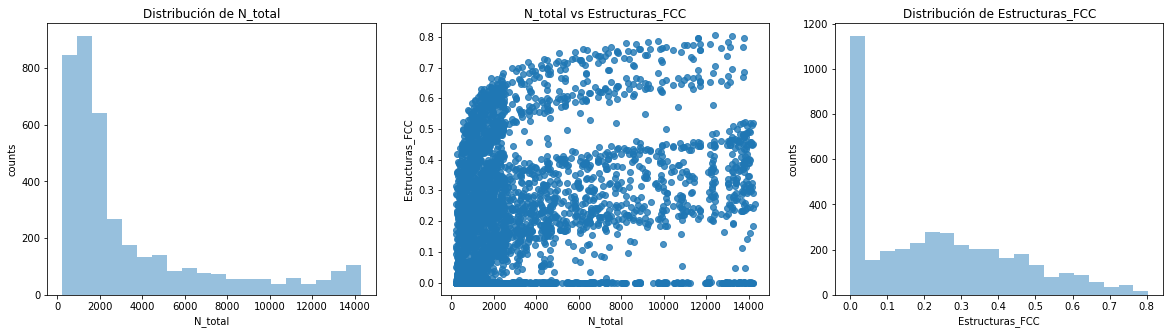

In [58]:
testDeHipotesis(data_7, "N_total", "Estructuras_FCC")

# 3er Test de Hipotesis. Energia por atomo con arreglo en FCC

In [37]:
testDeHipotesis(data, "Avg", "FCC")

Hipótesis
	 Nula (H0): No exite relación entre Avg y FCC
	 Alternativa (HA): Sí exite relación entre Avg y FCC
________________________________________
Nota: 
	Se utiliza un nivel de confianza del 95%
	Es decir que si se obtiene  p_valor < 0.05:
	Se rechaza la H0 y existe una correlación significativa.
	En caso contrario no es posible afirmar que la correlación difiera significativamente de 0.
________________________________________
Coeficientes correlación y P_values según distintas implementaciones:


KeyError: 'Avg'

In [ ]:
data

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,973,0.000250,6,1509,950,559,2.550000e-26,13.8048,23.1729,...,0,0,0,0,0,0,0,0,-5346.9589,553.2311
3996,3997,973,0.000250,7,2315,1469,846,3.920000e-26,12.0020,36.7573,...,0,0,0,0,0,0,0,0,-8218.1252,833.5248
3997,3998,973,0.000250,8,2764,1905,859,4.680000e-26,18.8611,24.6101,...,0,0,0,0,0,0,0,0,-9876.2899,930.9501
3998,3999,973,0.000250,9,3148,2199,949,5.330000e-26,18.7624,26.0008,...,0,0,0,0,0,0,0,0,-11261.0810,1047.5990


Hipótesis
	 Nula (H0): No exite relación entre ID y T
	 Alternativa (HA): Sí exite relación entre ID y T
________________________________________
Nota: 
	Se utiliza un nivel de confianza del 95%
	Es decir que si se obtiene  p_valor < 0.05:
	Se rechaza la H0 y existe una correlación significativa.
	En caso contrario no es posible afirmar que la correlación difiera significativamente de 0.
________________________________________
Coeficientes correlación y P_values según distintas implementaciones:
	Correlación Pearson: r=0.9863915209688601, p-value=0.0
	Correlación Spearman: r=0.9891284351126709, p-value=0.0
	Correlación Pearson: r=0.9328545194126451, p-value=0.0
********************************************************************************
Se rechaza H0 
	 Exite correlación significativa entre ID y T
********************************************************************************


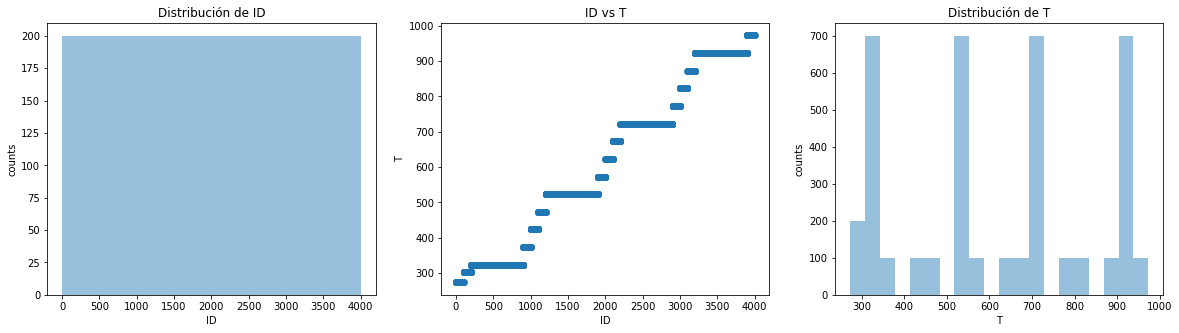

In [ ]:
testDeHipotesis(data, "ID", "T")

Hipótesis
	 Nula (H0): No exite relación entre N_total y ICOS
	 Alternativa (HA): Sí exite relación entre N_total y ICOS
________________________________________
Nota: 
	Se utiliza un nivel de confianza del 95%
	Es decir que si se obtiene  p_valor < 0.05:
	Se rechaza la H0 y existe una correlación significativa.
	En caso contrario no es posible afirmar que la correlación difiera significativamente de 0.
________________________________________
Coeficientes correlación y P_values según distintas implementaciones:
	Correlación Pearson: r=0.07947722179687175, p-value=4.829323233371428e-07
	Correlación Spearman: r=0.058392927628093415, p-value=0.00021980737537295638
	Correlación Pearson: r=0.047608482252877005, p-value=0.00022077569955017198
********************************************************************************
Se rechaza H0 
	 Exite correlación significativa entre N_total y ICOS
********************************************************************************


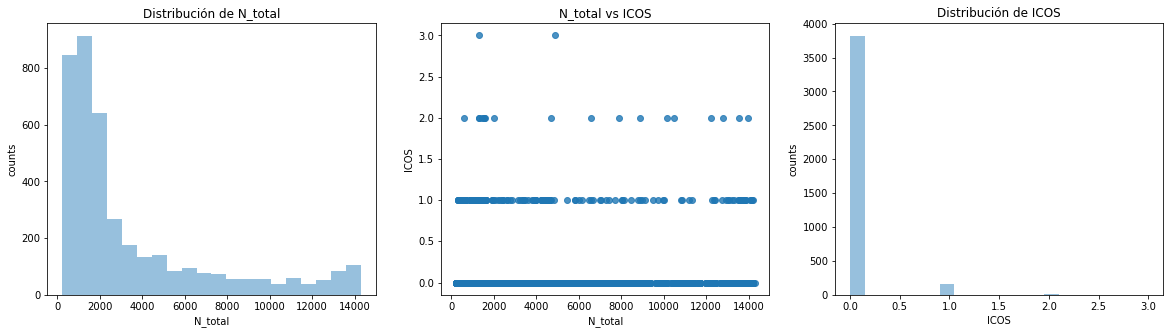

In [ ]:
testDeHipotesis(data, "N_total", "ICOS")